In [1]:
%run PreProcessing.ipynb

Current Progress: 100.0 %


In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from statistics import mode
import matplotlib.pyplot as plt

In [3]:
# Remove the most rogue 10% of data so outliers don't impact model as much.

print(f"The old training dataframe shape: {summary_data_avg.shape}")

iso = IsolationForest(max_samples=500, random_state = 10, contamination= 0.1)
preds = iso.fit_predict(summary_data_avg[['d_lin',
                                          's_lin',
                                          'pp2m2',
                                          'sand',
                                          'silt',
                                          'clay',
                                          'organic_matter',
                                          'heat_units',
                                          'solar_radiation',]]
                        )

totalOutliers=0

for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
        
print("Total number of outliers identified is: ",totalOutliers)

filtered_array = []
unfiltered_array = []
for element in preds:
  if element != -1:
    filtered_array.append(True)
    unfiltered_array.append(False)
  else:
    filtered_array.append(False)
    unfiltered_array.append(True)

summary_data_avg_outliers = summary_data_avg[unfiltered_array]

summary_data_avg = summary_data_avg[filtered_array]

print(f"The new training dataframe shape: {summary_data_avg.shape}")

The old training dataframe shape: (3445, 27)
Total number of outliers identified is:  345
The new training dataframe shape: (3100, 27)


In [4]:
X = summary_data_avg[['method',
                      'inputs',
                      'variety',
                      'protection',
                      'solar_radiation',
                      'heat_units',
                      'pp2m2',
                      'organic_matter']]

y = summary_data_avg['d_lin']

X = pd.get_dummies(X, columns = ['method',
                                 'inputs',
                                 'variety',
                                 'protection'], drop_first = True)

reg = LinearRegression(normalize=True).fit(X, y)
preds = reg.predict(X)
summary_data_avg['preds'] = preds

print(reg.score(X, y))

0.8203755514066616


<ipython-input-4-641b8975f3e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_avg['preds'] = preds


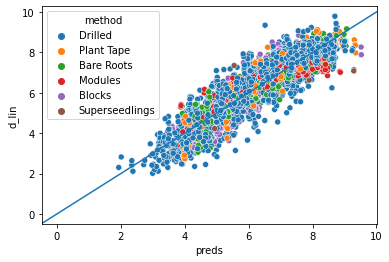

In [5]:
sns.scatterplot(x = 'preds', y = 'd_lin', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()

In [6]:
coef_list = list(reg.coef_)
var_list = list(X)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

,variable,coef
0,solar_radiation,6.339420e-07
1,heat_units,2.989883e-03
2,pp2m2,7.062571e-03
3,organic_matter,1.733151e-02
4,method_Blocks,-6.516794e-01
5,method_Drilled,-2.652538e+00
6,method_Modules,-8.607648e-02
7,method_Plant Tape,-6.474284e-01
8,method_Superseedlings,-4.215592e-01
9,inputs_Conventional,1.353366e+00
